In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forbes-highest-paid-athletes-19902019/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv


In [2]:
import pandas as pd
df = pd.read_csv("../input/forbes-highest-paid-athletes-19902019/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")

In [3]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [5]:
df.columns =[column.replace(" ", "_") for column in df.columns]
df.head()

,S.NO,Name,Nationality,Current_Rank,Previous_Year_Rank,Sport,Year,earnings_($_million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [6]:
df.describe()

,S.NO,Current_Rank,Year,earnings_($_million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


In [7]:
new_df= df.isna().sum()


In [8]:
new_df = df.dropna()
new_df.head()

,S.NO,Name,Nationality,Current_Rank,Previous_Year_Rank,Sport,Year,earnings_($_million)
10,11,Evander Holyfield,USA,1,8,boxing,1991,60.5
11,12,Mike Tyson,USA,2,1,boxing,1991,31.5
12,13,Michael Jordan,USA,3,8,basketball,1991,16.0
13,14,George Foreman,USA,4,>30,boxing,1991,14.5
14,15,Ayrton Senna,Brazil,5,4,auto racing,1991,13.0


**Conclusion 1:**
Below Graph Shows which player  appeared most on the Forbes Highest Paid Athelte and it is highly visible that Michael Jordan has appeared more in the Article.

In [9]:
name_df= df.groupby(['Name'])
name_df1= name_df['Name'].count().reset_index(name='Count').sort_values('Count',ascending=False).head(10)
name_df1

,Name,Count
52,Michael Jordan,19
78,Tiger Woods,19
43,Kobe Bryant,14
45,LeBron James,13
54,Michael Schumacher,13
68,Roger Federer,12
65,Phil Mickelson,11
14,Cristiano Ronaldo,10
48,Lionel Messi,9
74,Shaquille O'Neal,9


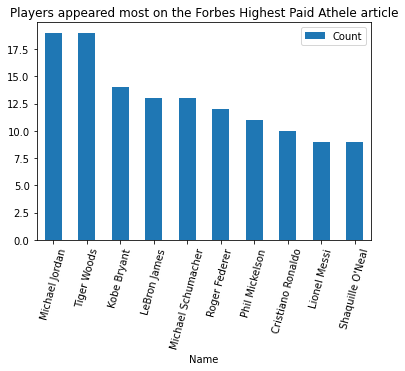

In [10]:
import matplotlib.pyplot as plot
name_df1.plot.bar(x="Name", y="Count",rot=75, title="Players appeared most on the Forbes Highest Paid Athele article");

plot.show();

**Counclusion 2:**
The below graph shows which country appeared most on the Forbes Highest Paid Athelte and it is highly visible that USA appeared most in the article

In [11]:
country_df= df.groupby(['Nationality'])
country_df1= country_df['Nationality'].count().reset_index(name='Count').sort_values('Count',ascending=False).head(10)
country_df1

,Nationality,Count
21,USA,206
9,Germany,13
20,UK,13
19,Switzerland,12
15,Portugal,10
0,Argentina,9
3,Brazil,9
4,Canada,6
11,Italy,4
7,Finland,3


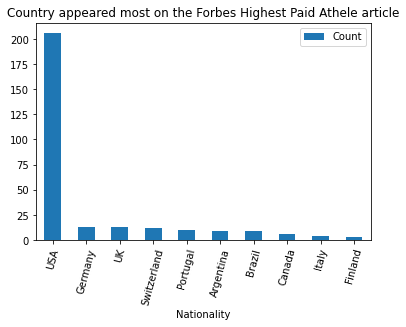

In [12]:
country_df1.plot.bar(x="Nationality", y="Count",rot=75, title="Country appeared most on the Forbes Highest Paid Athele article");

plot.show();

**Conclusion 3**: The below graph shows which player bagged Rank 1 most of the times and it is visible that Tiger Woods had bagged Rank1 most of the times over the years.

In [13]:
rank_df= new_df.query('Current_Rank ==1')
rank_df.head()
rank_df1= rank_df.groupby(['Name'])
rank_df1
rank_df2= rank_df1['Name'].count().reset_index(name='Count').sort_values('Count',ascending=False).head(10)
rank_df2

,Name,Count
8,Tiger Woods,11
4,Michael Jordan,5
2,Floyd Mayweather,4
0,Cristiano Ronaldo,2
5,Michael Schumacher,2
1,Evander Holyfield,1
3,Lionel Messi,1
6,Mike Tyson,1
7,Roger Federer,1


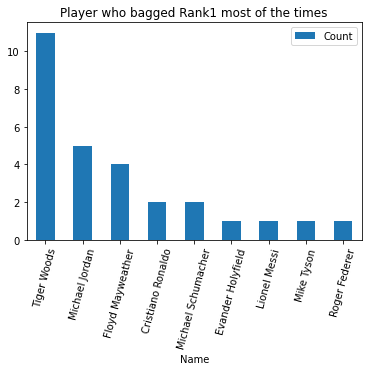

In [14]:
rank_df2.plot.bar(x="Name", y="Count",rot=75, title="Player who bagged Rank1 most of the times");

plot.show();

In [15]:
new_df.head()
new_df1 = new_df.rename({'earnings_($_million)': 'Earnings'}, axis=1)
new_df1.head()

,S.NO,Name,Nationality,Current_Rank,Previous_Year_Rank,Sport,Year,Earnings
10,11,Evander Holyfield,USA,1,8,boxing,1991,60.5
11,12,Mike Tyson,USA,2,1,boxing,1991,31.5
12,13,Michael Jordan,USA,3,8,basketball,1991,16.0
13,14,George Foreman,USA,4,>30,boxing,1991,14.5
14,15,Ayrton Senna,Brazil,5,4,auto racing,1991,13.0


Conclusion 4: The below graph shows that which player has earned more than 100 million over the years and the answer is TigerWoods

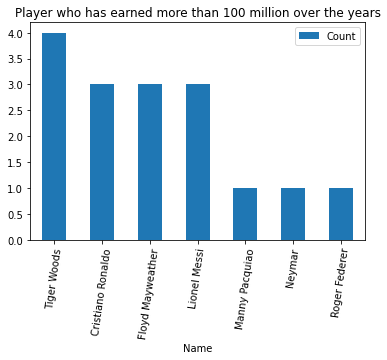

In [16]:
high_pay = new_df1.query('Earnings>= 100')
high_pay1 = high_pay.groupby(['Name'])
high_pay2 = high_pay1['Name'].count().reset_index(name='Count').sort_values('Count',ascending=False).head(10)
high_pay2
high_pay2.plot.bar(x="Name", y="Count",rot=82, title="Player who has earned more than 100 million over the years");
plot.show()

Exploratory Data analysis and Visualization
->To talk about the dataset and how it will be helpful 
->information about the highest paid athelets
->To know about the trends on Forbes highest paid athelets from 1990 to 2020

Ask and answer questions
1.who is the highest paid athlete each year
2.which country appeared most on the Forbes Highest Paid Athelte
3.which sport has the highest paid athelet
4.which player bagged rank 1 most of the times
5.players who have earned 100m over the years.

Summary and Conclusions